## Week4 授業前課題2 住宅価格の予測

Week3で使用したアイオワ州エイムズ市の住宅価格データセットを使い、回帰問題を解く練習をします。


79種類の特徴量（説明変数）を活用し、住宅価格の数値を推測する問題が設定できます。こういった連続値のものを推測する問題を回帰問題と呼びます。

今回使う手法の一覧
scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。


・線形回帰

・SVM

・決定木

・ランダムフォレスト

分類問題と回帰問題の両方で使える手法と、そうではない手法が存在します。

練習のための準備
このデータセットには79種類の特徴量（目的変数）がありますが、Week3で探索して分かったように様々なタイプのデータ含まれています。これをどう前処理するかということは機械学習において重要な箇所ですが、今回は回帰問題の学習や評価の練習を優先するため、説GrLivAreaとYearBuiltの2つだけを利用することにします。

### 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train_data = pd.read_csv("train.csv")
pd.set_option('display.max_columns', 100)
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [7]:
train_data.loc[:,["GrLivArea","YearBuilt"]]

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000
...,...,...
1455,1647,1999
1456,2073,1978
1457,2340,1941
1458,1078,1950


### 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。

可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

### 線形回帰

In [8]:
X = train_data.loc[:,["GrLivArea","YearBuilt"]]
y = train_data.loc[:,["SalePrice"]]
Xy = pd.concat([X,y],axis=1)
Xy

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


In [9]:
Xy.corr() #相関係数

,GrLivArea,YearBuilt,SalePrice
GrLivArea,1.000000,0.199010,0.708624
YearBuilt,0.199010,1.000000,0.522897
SalePrice,0.708624,0.522897,1.000000


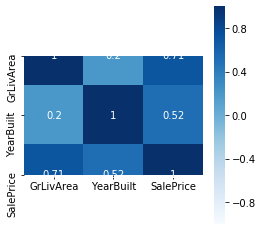

In [10]:
plt.figure(figsize=(4,4))
sns.heatmap(Xy.corr(),square=True,annot=True,vmax=1, vmin=-1, center=0,cmap='Blues')

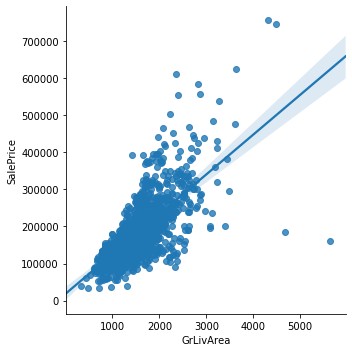

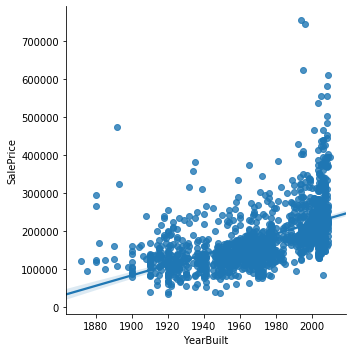

In [11]:
sns.lmplot(x="GrLivArea", y="SalePrice", data=Xy)
sns.lmplot(x="YearBuilt", y="SalePrice", data=Xy)

In [20]:
# 学習させるために特徴量のデータフレームを取り出してnp.array型に変換
X = train_data.loc[:,["GrLivArea","YearBuilt"]]
X

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000
...,...,...
1455,1647,1999
1456,2073,1978
1457,2340,1941
1458,1078,1950


In [21]:
# 学習させるためにラベルのデータフレームを取り出してnp.array型に変換
y = train_data.loc[:,["SalePrice"]]
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [32]:
# 訓練データとテストデータに分ける
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=42)

In [33]:
# 　標準化
from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()
sscaler.fit(X_train)
X_train_scalered = sscaler.transform(X_train)
X_test_scalered = sscaler.transform(X_test)

In [34]:
from sklearn import linear_model 
clf = linear_model.LinearRegression()

# 予測モデルを作成
clf.fit(X_train_scalered, y_train)
 
# 回帰係数
print(clf.coef_)
 
# 切片 (誤差)
print(clf.intercept_)

[[48581.24689919 32305.10745427]]
[181712.28675799]


In [35]:
from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_test_scalered)
mse = mean_squared_error(y_test, y_pred)
print("平均二乗誤差：{:.3g}".format(mse))

平均二乗誤差：2.31e+09


In [36]:
X_test["GrLivArea"]

892     1068
1105    2622
413     1028
522     1664
1036    1620
        ... 
988     2030
243     1217
1342    2169
1057    1850
1418    1144
Name: GrLivArea, Length: 365, dtype: int64

In [37]:
y_pred

array([[130445.81129484],
       [306448.48211547],
       [ 88741.8324304 ],
       [168496.12883044],
       [227800.17562669],
       [ 99569.77660678],
       [186783.75135889],
       [182056.44293199],
       [ 97457.76006969],
       [151960.15487048],
       [131192.06213304],
       [117840.59883308],
       [ 84836.16656948],
       [216795.82827786],
       [226861.55984128],
       [114354.20681418],
       [233851.35381306],
       [133362.46046392],
       [ 79874.70207186],
       [210577.06633379],
       [191870.90367478],
       [226090.42299764],
       [212412.50678112],
       [110884.40546558],
       [201927.81582345],
       [174203.21527073],
       [201986.40724909],
       [ 98966.53796861],
       [215765.02046252],
       [202036.70333958],
       [ 89328.69003012],
       [262849.94729844],
       [298537.18710817],
       [112359.4779443 ],
       [228219.23983687],
       [138826.88586649],
       [193790.24081689],
       [251971.28776788],
       [2959

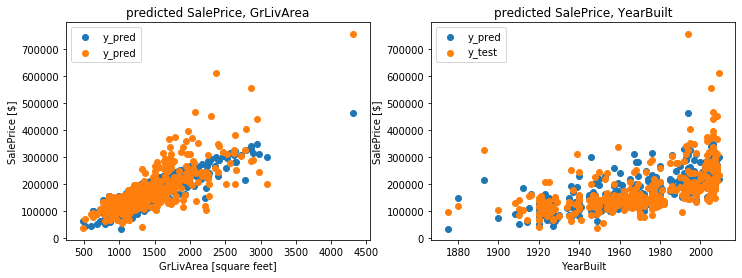

In [40]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.title("predicted SalePrice, GrLivArea")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["GrLivArea"].values, y_pred,label="y_pred")
plt.scatter(X_test["GrLivArea"].values, y_test,label="y_pred")
plt.legend()

plt.subplot(122)
plt.title("predicted SalePrice, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["YearBuilt"].values, y_pred,label="y_pred")
plt.scatter(X_test["YearBuilt"].values, y_test,label="y_test")
plt.legend()

plt.show()

### 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。


・線形回帰

・SVM

・決定木

・ランダムフォレスト

SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。

### SVM

In [41]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')

# 予測モデルを作成
svr.fit(X_train_scalered, y_train)
 
# 回帰係数
print(svr.coef_)
 
# 切片 (誤差)
print(svr.intercept_)

[[601.58025358 593.820845  ]]
[165120.18758833]


/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
y_pred_svr = svr.predict(X_test_scalered)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("平均二乗誤差：{:.3g}".format(mse_svr))

平均二乗誤差：7.06e+09


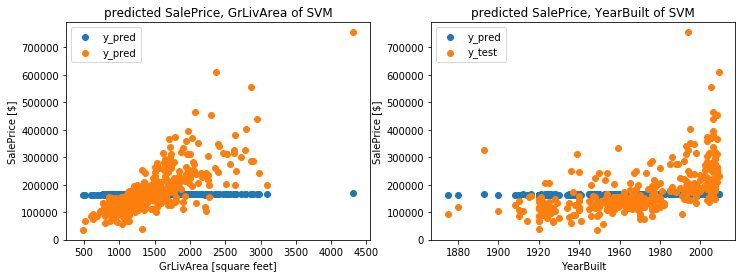

In [44]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.title("predicted SalePrice, GrLivArea of SVM")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["GrLivArea"].values, y_pred_svr,label="y_pred")
plt.scatter(X_test["GrLivArea"].values, y_test,label="y_pred")
plt.legend()

plt.subplot(122)
plt.title("predicted SalePrice, YearBuilt of SVM")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["YearBuilt"].values, y_pred_svr,label="y_pred")
plt.scatter(X_test["YearBuilt"].values, y_test,label="y_test")
plt.legend()

plt.show()

### 決定木

In [64]:
from sklearn import tree
ketteigi = tree.DecisionTreeRegressor(max_depth=3)

# 予測モデルを作成
ketteigi.fit(X_train_scalered, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [65]:
y_pred_ketteigi = ketteigi.predict(X_test_scalered)
mse_ketteigi = mean_squared_error(y_test,y_pred_ketteigi)
print("平均二乗誤差：{:.3g}".format(mse_ketteigi))

平均二乗誤差：2.43e+09


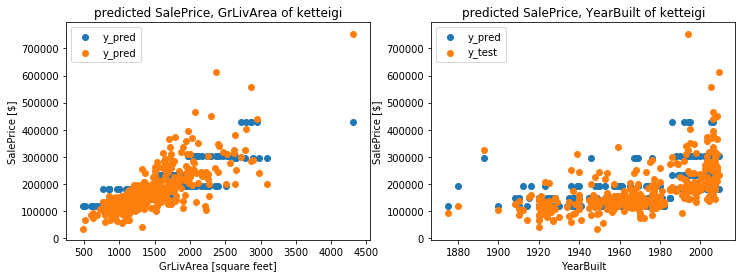

In [50]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.title("predicted SalePrice, GrLivArea of ketteigi")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["GrLivArea"].values, y_pred_ketteigi,label="y_pred")
plt.scatter(X_test["GrLivArea"].values, y_test,label="y_pred")
plt.legend()

plt.subplot(122)
plt.title("predicted SalePrice, YearBuilt of ketteigi")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["YearBuilt"].values, y_pred_ketteigi,label="y_pred")
plt.scatter(X_test["YearBuilt"].values, y_test,label="y_test")
plt.legend()

plt.show()

### ランダムフォレスト

In [66]:
from sklearn.ensemble import RandomForestRegressor
RFC = RandomForestRegressor()

# 予測モデルを作成
RFC.fit(X_train_scalered, y_train)

/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [68]:
y_pred_RFC = RFC.predict(X_test_scalered)
mse_RFC = mean_squared_error(y_test,y_pred_RFC)
print("平均二乗誤差：{:.3g}".format(mse_RFC))

平均二乗誤差：1.7e+09


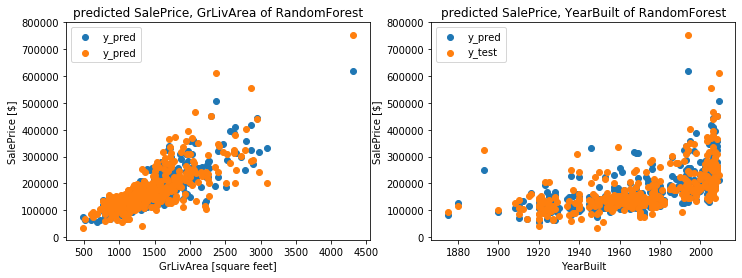

In [69]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.title("predicted SalePrice, GrLivArea of RandomForest")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["GrLivArea"].values, y_pred_RFC,label="y_pred")
plt.scatter(X_test["GrLivArea"].values, y_test,label="y_pred")
plt.legend()

plt.subplot(122)
plt.title("predicted SalePrice, YearBuilt of RandomForest")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["YearBuilt"].values, y_pred_RFC,label="y_pred")
plt.scatter(X_test["YearBuilt"].values, y_test,label="y_test")
plt.legend()

plt.show()

In [70]:
pd.DataFrame({"線形回帰":mse,"SVM":mse_svr,"決定木":mse_ketteigi,"ランダムフォレスト":mse_RFC},index=["MSE"])

,線形回帰,SVM,決定木,ランダムフォレスト
MSE,2.314465e+09,7.062693e+09,2.433745e+09,1.699309e+09


### 【問題4】（アドバンス課題）他の特徴量も使用しての学習
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。


KaggleのNotebooksも参考にできます。

**GrLivAreaとYearBuiltに対する相関係数が低い、かつ、ターゲットと相関係数が高い特徴量を使用することを考える。**

In [98]:
data_dorr = train_data.corr()
display(data_dorr[["GrLivArea","SalePrice"]].sort_values("GrLivArea",ascending=False))
display(data_dorr[["YearBuilt","SalePrice"]].sort_values("YearBuilt",ascending=False))

,GrLivArea,SalePrice
GrLivArea,1.000000,0.708624
TotRmsAbvGrd,0.825489,0.533723
SalePrice,0.708624,1.000000
2ndFlrSF,0.687501,0.319334
FullBath,0.630012,0.560664
OverallQual,0.593007,0.790982
1stFlrSF,0.566024,0.605852
BedroomAbvGr,0.521270,0.168213
GarageArea,0.468997,0.623431
GarageCars,0.467247,0.640409


,YearBuilt,SalePrice
YearBuilt,1.000000,0.522897
GarageYrBlt,0.825667,0.486362
YearRemodAdd,0.592855,0.507101
OverallQual,0.572323,0.790982
GarageCars,0.537850,0.640409
SalePrice,0.522897,1.000000
GarageArea,0.478954,0.623431
FullBath,0.468271,0.560664
TotalBsmtSF,0.391452,0.613581
MasVnrArea,0.315707,0.477493


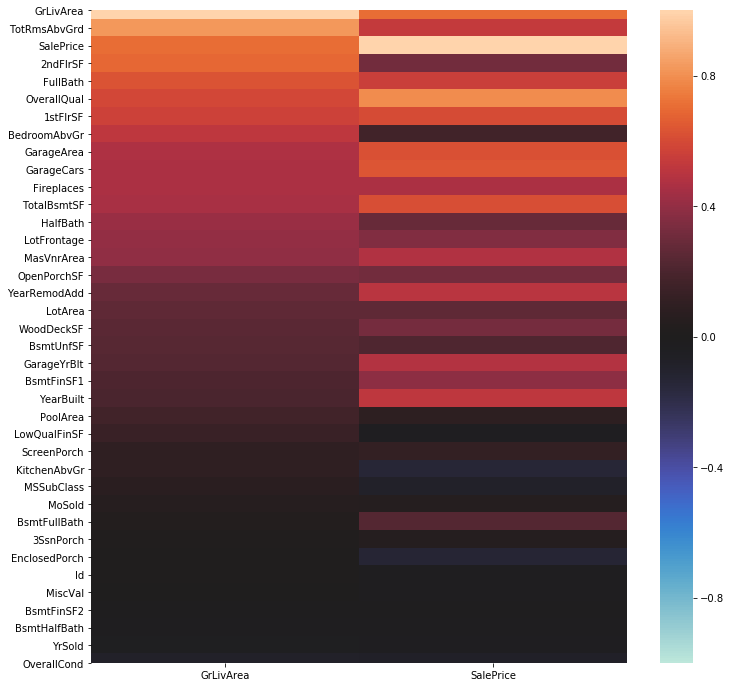

In [118]:
plt.figure(figsize=(12,12))
sns.heatmap(data_dorr[["GrLivArea","SalePrice"]].sort_values("GrLivArea",ascending=False),center=0,vmax=1,vmin=-1)

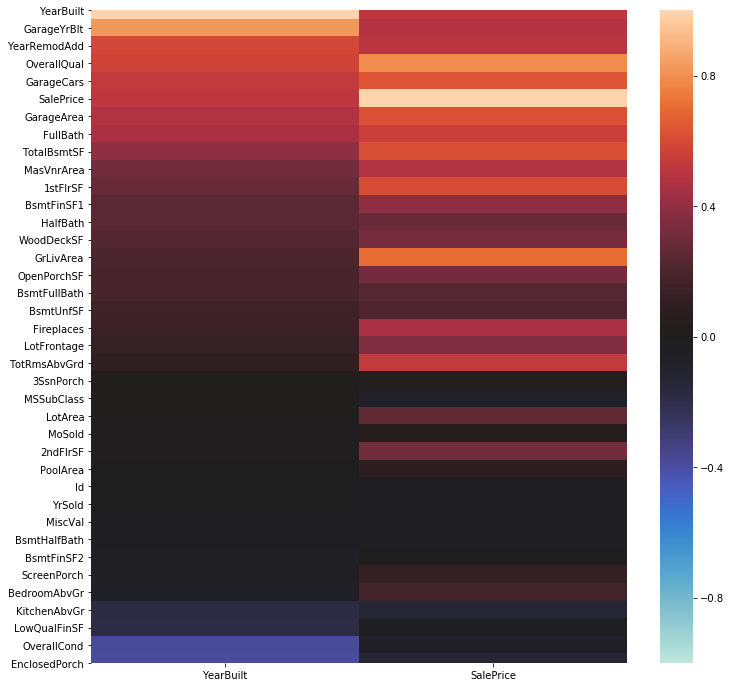

In [119]:
plt.figure(figsize=(12,12))
sns.heatmap(data_dorr[["YearBuilt","SalePrice"]].sort_values("YearBuilt",ascending=False),center=0,vmax=1,vmin=-1)

上記の相関係数のヒートマップから　**BsmtFinSF1**　を学習する特徴量として追加する。


またモデルは、最も精度が高かったランダムフォレストを使用する。

In [165]:
X = train_data[["GrLivArea","YearBuilt","BsmtFinSF1"]]
y = train_data[["SalePrice"]]

# 訓練データとテストデータに分ける
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=42)

# 　標準化
from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()
sscaler.fit(X_train)
X_train_scalered = sscaler.transform(X_train)
X_test_scalered = sscaler.transform(X_test)

RFC_kai = RandomForestRegressor()

# 予測モデルを作成
RFC_kai.fit(X_train_scalered, y_train)

#評価
y_pred_RFC_kai = RFC_kai.predict(X_test_scalered)
mse_RFC_kai = mean_squared_error(y_test,y_pred_RFC_kai)
print("平均二乗誤差：{:.3g}".format(mse_RFC_kai))

平均二乗誤差：1.23e+09


/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


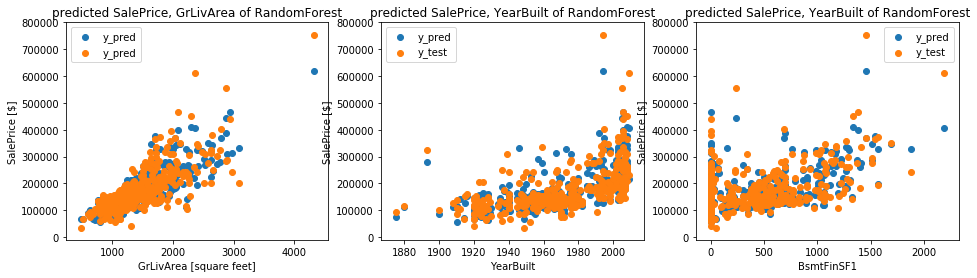

In [129]:
plt.figure(figsize=(16,4))

plt.subplot(131)
plt.title("predicted SalePrice, GrLivArea of RandomForest")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["GrLivArea"].values, y_pred_RFC_kai,label="y_pred")
plt.scatter(X_test["GrLivArea"].values, y_test,label="y_pred")
plt.legend()

plt.subplot(132)
plt.title("predicted SalePrice, YearBuilt of RandomForest")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["YearBuilt"].values, y_pred_RFC_kai,label="y_pred")
plt.scatter(X_test["YearBuilt"].values, y_test,label="y_test")
plt.legend()

plt.subplot(133)
plt.title("predicted SalePrice, YearBuilt of RandomForest")
plt.xlabel("BsmtFinSF1")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["BsmtFinSF1"].values, y_pred_RFC_kai,label="y_pred")
plt.scatter(X_test["BsmtFinSF1"].values, y_test,label="y_test")
plt.legend()

plt.show()

今回の平均二乗誤差は1.23e+09であり、初めの1.7e+09よりも小さい値となっているため精度は上昇したと考えられる。

### 参考（自主取り組み）
test_dataを評価しカグルに提出する。

In [131]:
#データ取得
test_data = pd.read_csv("house-prices-test.csv")
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [170]:
#学習時のデータから"BsmtFinSF1"の平均値を算出
X_train["BsmtFinSF1"].mean()

448.17808219178085

In [177]:
#上記で算出した値でテストデータの"BsmtFinSF1"のなかの欠損値を埋める。
test_data = test_data.fillna({"BsmtFinSF1": X_train["BsmtFinSF1"].mean()})
test_data.isnull().sum()["BsmtFinSF1"]

0

In [198]:
X_test = test_data[["GrLivArea","YearBuilt","BsmtFinSF1"]]

#標準化
X_test_scalered = sscaler.transform(X_test)

#学習済みモデルで予想
X_pred_RFC_kai = RFC_kai.predict(X_test_scalered)
X_pred_RFC_kai = X_pred_RFC_kai.reshape(-1,1)

In [214]:
#idと合わせて提出用の変数を作成
id = test_data["Id"].values.reshape(-1,1)
test = np.concatenate([id,X_pred_RFC_kai],axis=1)
test = pd.DataFrame(test,columns=["Id","SalePrice"])
test["Id"] = test["Id"].astype(int)

In [215]:
test.to_csv('house-prices-test-submission.csv',index=False)